In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [4]:
print(boston_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB
None


## Box plot of the Median Value of owner occupied homes.

Text(0, 0.5, 'Median value')

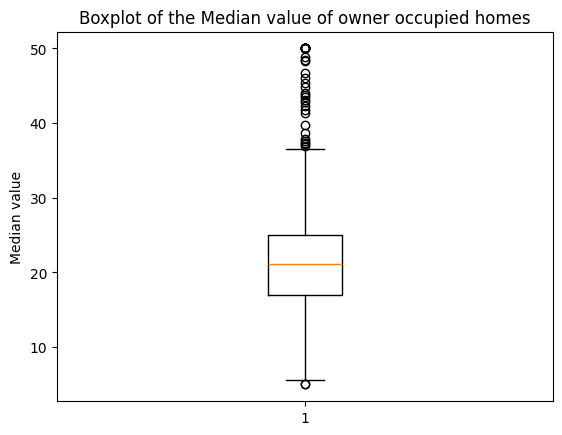

In [5]:
data = boston_df.MEDV.values
plt.boxplot(data)
plt.title("Boxplot of the Median value of owner occupied homes")
plt.ylabel("Median value")

## Provide a  bar plot for the Charles river variable

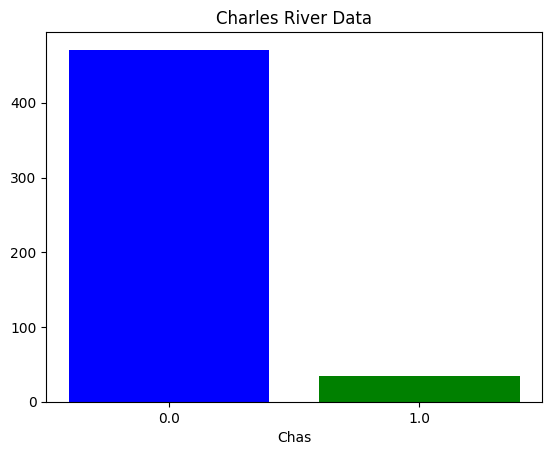

In [81]:
types = boston_df.CHAS.unique().astype(str)
values= [boston_df.CHAS.loc[boston_df.CHAS==0].shape[0], boston_df.CHAS.loc[boston_df.CHAS!=0].shape[0]]
plt.bar(types, values, color=['blue', 'green'])
plt.title("Charles River Data")
plt.xlabel('Chas')
plt.show()



#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

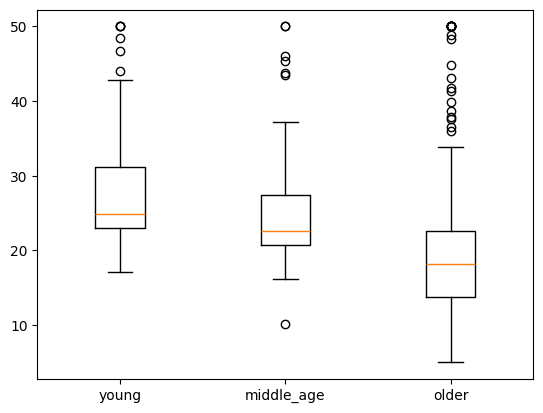

In [113]:
young =boston_df[["MEDV","AGE"]].loc[boston_df["AGE"]<=35]
middle_age = boston_df[["MEDV","AGE"]].loc[(boston_df["AGE"]>35)& (boston_df["AGE"]<70)]
older = boston_df[["MEDV","AGE"]].loc[(boston_df["AGE"]>=70)]
categories = ["young", "middle_age",  "older"]
values =[young["MEDV"].values, middle_age["MEDV"].values, older['MEDV'].values]
plt.boxplot(values, labels=categories)
plt.show()


### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
There is a positive correlation between nitric oxide concentrations and the proportion of non-retail business acres


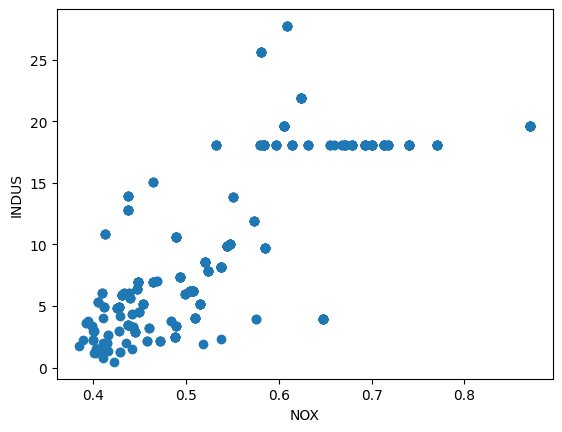

In [120]:
y = boston_df.INDUS.values
x = boston_df.NOX.values
plt.scatter(x,y)
plt.xlabel("NOX")
plt.ylabel("INDUS")
plt.show()

## Create a histogram for the pupil to teacher ratio variable

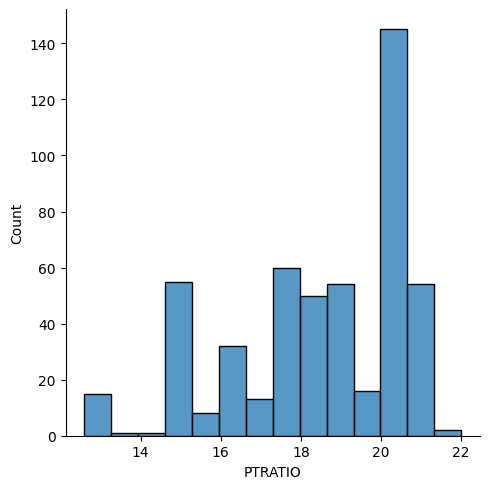

In [123]:
ax = sns.displot(boston_df['PTRATIO'], kde = False)

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:
- null = ("there is no difference in median value of houses bounded by the Charles river")
- alternate ("there is a difference in median value of houses bounded by the Charles river")

In [134]:
import scipy.stats
import statsmodels.api as sm

In [126]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Since the p-value is less than 0.05 we reject the null hypothesis

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

- Null-The three means are equal
- Alternative-At least one of the means differ

In [128]:
thirtyfive_lower = young['MEDV']
thirtyfive_seventy = middle_age['MEDV']
seventy_older = older['MEDV']

In [130]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Since the p-value is less than 0.05, we reject the null hypothesis

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

- Null-both do not correlate
- Alternative-both correlate

In [131]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209154, pvalue=7.913361061239591e-98)

Conclusion: Since the p-value < 0.05, we reject the Null hypothesis

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

- Null-Dis is not correlated with MEDV
- Alternative -Dis is correlated with MEDV

In [135]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        14:47:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value < 0.05, we reject the Null hypothesis